In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.ensemble import RandomForestClassifier
from pyswarm import pso

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [23]:
#importing data from the dataset
df = pd.read_csv(r"C:\Users\agarw\OneDrive\Desktop\Dissertation\data.csv")

In [24]:
#checking for bankrupt companies 0 is non-bankrupt and 1 is bankrupt
bankrupt_data = df['Bankrupt?'].value_counts()
bankrupt_data

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

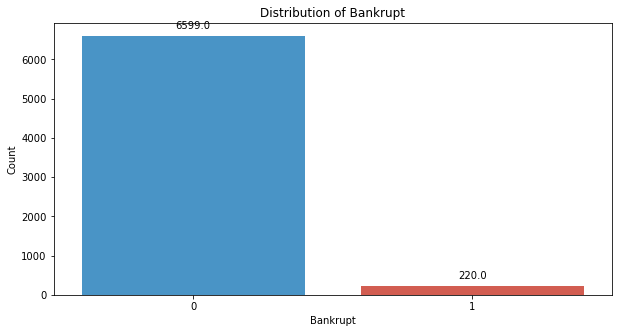

In [25]:
#Distribution representation
plt.figure(figsize = (10,5))
colors = ["#3498db", "#e74c3c"]
ax = sns.countplot(x=df['Bankrupt?'], data=df,palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add labels and title
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.title('Distribution of Bankrupt')

# Show the plot
plt.show()

In [26]:
# seperate the Bankrupt label from the dataset 
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis = 1)

In [27]:
# divinding our dataset into training dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

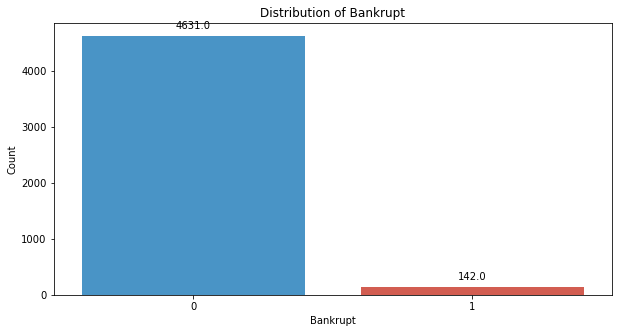

In [28]:
plt.figure(figsize = (10,5))
colors = ["#3498db", "#e74c3c"]
ax = sns.countplot(x=y_train, data=df,palette=colors)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Add labels and title
plt.xlabel('Bankrupt')
plt.ylabel('Count')
plt.title('Distribution of Bankrupt')

# Show the plot
plt.show()

In [29]:
# divinding our dataset into testing and validation 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [30]:
# Use SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [31]:
# Standardize the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [32]:
# Address Class Imbalance
class_weights = {0: 1, 1: 10}  # Adjust weights based on the actual class distribution

In [33]:
# Neural Network Model
def create_model(params):
    model = Sequential()
    model.add(Dense(params[0], input_dim=X_train_resampled.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [34]:
# PSO Objective Function
def objective_function(params):
    hidden_units = int(params[0])
    model = create_model([hidden_units])
    model.fit(X_train_resampled, y_train_resampled, epochs=20, class_weight=class_weights, verbose=0)
    y_val_prob = model.predict(X_val)
    y_val_pred = (y_val_prob > 0.4).astype(int)  # Adjust the threshold
    f1 = f1_score(y_val, y_val_pred)
    return -f1  # PSO minimizes the objective function, so we use negative F1 score

In [35]:
# PSO Optimization
lb = [5]  # Lower bounds for the number of hidden units
ub = [50]  # Upper bounds for the number of hidden units
best_params, _ = pso(objective_function, lb, ub, swarmsize=10, maxiter=10)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Stopping search: Swarm best position change less than 1e-08


In [36]:
# Train the final model with the best parameters
best_hidden_units = int(best_params[0])
final_model = create_model([best_hidden_units])
final_model.fit(X_train_resampled, y_train_resampled, epochs=50, class_weight=class_weights, verbose=1)

Epoch 1/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.7312 - loss: 1.4306
Epoch 2/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.8290 - loss: 0.6495
Epoch 3/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.8729 - loss: 0.5019
Epoch 4/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.8894 - loss: 0.4494
Epoch 5/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.8998 - loss: 0.3895
Epoch 6/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.9120 - loss: 0.3465
Epoch 7/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.9171 - loss: 0.3210
Epoch 8/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.9334 - loss: 0.2592
Epoch 9/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.9366 - loss: 0.2491
Epoch 10/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.9446 - loss: 0.2323
Epoch 11/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.9486 - loss: 0.2082
Epoch 12/50
218/218 ━━━━━━━━━━

In [37]:
# Evaluate the final model on the validation set
y_val_prob = final_model.predict(X_val)
y_pred_val = (y_val_prob > 0.4).astype(int)  # Adjust the threshold

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [38]:
# Evaluate the model's performance on the Validation set
val_accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val)
recall = recall_score(y_val, y_pred_val)
f1_value = f1_score(y_val, y_pred_val)
val_report = classification_report(y_val, y_pred_val)

print("Accuracy", val_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Validation Classification Report:\n", val_report)

Accuracy 0.9521016617790812
Precision 0.40384615384615385
Recall 0.5384615384615384
F1 Score 0.46153846153846156
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       984
           1       0.40      0.54      0.46        39

    accuracy                           0.95      1023
   macro avg       0.69      0.75      0.72      1023
weighted avg       0.96      0.95      0.96      1023



In [39]:
conf_matrix = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[953  31]
 [ 18  21]]


In [52]:
# Evaluate the final model on the validation set
y_test_prob = final_model.predict(X_test)
y_pred_test = (y_test_prob > 0.).astype(int)  # Adjust the threshold

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step


In [53]:
# Evaluate the model's performance on the Validation set
val_accuracy = accuracy_score(y_val, y_pred_test)
precision = precision_score(y_val, y_pred_test)
recall = recall_score(y_val, y_pred_test)
f1_value = f1_score(y_val, y_pred_test)
val_report = classification_report(y_val, y_pred_test)

print("Accuracy", val_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Validation Classification Report:\n", val_report)

Accuracy 0.9130009775171065
Precision 0.019230769230769232
Recall 0.02564102564102564
F1 Score 0.02197802197802198
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       984
           1       0.02      0.03      0.02        39

    accuracy                           0.91      1023
   macro avg       0.49      0.49      0.49      1023
weighted avg       0.92      0.91      0.92      1023



In [45]:
conf_matrix = confusion_matrix(y_val, y_pred_test)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[946  38]
 [ 38   1]]
